In [1]:
import pandas as pd
import numpy as np

In [3]:
sentiment_df = pd.read_csv(r"C:\Users\divya\Downloads\fear_greed_index (1).csv")
trades_df = pd.read_csv(r"C:\Users\divya\Downloads\historical_data (1).csv")

In [4]:
print(sentiment_df.shape)

(2644, 4)


In [5]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [6]:
print(sentiment_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [7]:
print(trades_df.shape)

(211224, 16)


In [8]:
print(trades_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [9]:
print(trades_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [10]:
print(sentiment_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


In [11]:
print(trades_df.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [12]:
print(sentiment_df.duplicated().sum())

0


In [13]:
print(trades_df.duplicated().sum())

0


In [14]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [15]:
sentiment_df = sentiment_df[['date', 'classification']]

print("Sentiment date range:")
print(sentiment_df['date'].min(), "to", sentiment_df['date'].max())

Sentiment date range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [16]:
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'])

In [17]:
trades_df['date'] = trades_df['Timestamp'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])

In [18]:
print("\nTrader date range:")
print(trades_df['date'].min(), "to", trades_df['date'].max())


Trader date range:
1970-01-01 00:00:00 to 1970-01-01 00:00:00


In [19]:
print("\nSample sentiment data:")
print(sentiment_df.head())


Sample sentiment data:
        date classification
0 2018-02-01           Fear
1 2018-02-02   Extreme Fear
2 2018-02-03           Fear
3 2018-02-04   Extreme Fear
4 2018-02-05   Extreme Fear


In [20]:
print("\nSample trader data with date:")
print(trades_df[['Account', 'Coin', 'Side', 'Closed PnL', 'date']].head())


Sample trader data with date:
                                      Account  Coin Side  Closed PnL  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   

        date  
0 1970-01-01  
1 1970-01-01  
2 1970-01-01  
3 1970-01-01  
4 1970-01-01  


In [21]:
print(trades_df['Timestamp'].head(10))
print(trades_df['Timestamp IST'].head(10))

0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
5   1970-01-01 00:28:50
6   1970-01-01 00:28:50
7   1970-01-01 00:28:50
8   1970-01-01 00:28:50
9   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]
0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
5    02-12-2024 22:50
6    02-12-2024 22:50
7    02-12-2024 22:50
8    02-12-2024 22:50
9    02-12-2024 22:50
Name: Timestamp IST, dtype: object


In [22]:
print("\nSample trader data with date:")
print(trades_df[['Account', 'Coin', 'Side', 'Closed PnL', 'date']].head())


Sample trader data with date:
                                      Account  Coin Side  Closed PnL  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   

        date  
0 1970-01-01  
1 1970-01-01  
2 1970-01-01  
3 1970-01-01  
4 1970-01-01  


In [23]:
print(trades_df['Timestamp IST'].head(5))
print(trades_df['Timestamp IST'].dtype)

0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp IST, dtype: object
object


In [24]:
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)


In [25]:
trades_df['date'] = trades_df['Timestamp IST'].dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])

In [26]:
print(trades_df['date'].min(), "to", trades_df['date'].max())

2023-05-01 00:00:00 to 2025-05-01 00:00:00


In [27]:
print(trades_df[['Account', 'Coin', 'Side', 'Closed PnL', 'date']].head())

                                      Account  Coin Side  Closed PnL  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107  BUY         0.0   

        date  
0 2024-12-02  
1 2024-12-02  
2 2024-12-02  
3 2024-12-02  
4 2024-12-02  


In [28]:
trades_df['is_win'] = trades_df['Closed PnL'] > 0
trades_df['is_long'] = trades_df['Side'] == 'BUY'
trades_df['is_short'] = trades_df['Side'] == 'SELL'


In [30]:
daily_trader_metrics = (
    trades_df
    .groupby(['date', 'Account'])
    .agg(
        daily_pnl=('Closed PnL', 'sum'),
        trades_count=('Trade ID', 'count'),
        win_rate=('is_win', 'mean'),
        avg_trade_size_usd=('Size USD', 'mean'),
        long_trades=('is_long', 'sum'),
        short_trades=('is_short', 'sum')
    )
    .reset_index()
)
daily_trader_metrics['long_short_ratio'] = (
    daily_trader_metrics['long_trades'] /
    daily_trader_metrics['short_trades'].replace(0, np.nan)
)

print(daily_trader_metrics.head())
print("\nSummary statistics:")
print(daily_trader_metrics.describe())

        date                                     Account   daily_pnl  \
0 2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    0.000000   
1 2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    0.000000   
2 2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23 -205.434737   
3 2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  -24.632034   
4 2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    0.000000   

   trades_count  win_rate  avg_trade_size_usd  long_trades  short_trades  \
0             3  0.000000          159.000000            3             0   
1             9  0.000000         5556.203333            7             2   
2            11  0.363636        10291.213636            5             6   
3             2  0.000000         5304.975000            2             0   
4             3  0.000000         5116.256667            3             0   

   long_short_ratio  
0               NaN  
1          3.500000  
2          0.833333  
3               NaN  


In [31]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
daily_trader_metrics['date'] = pd.to_datetime(daily_trader_metrics['date'])

In [32]:
merged_df = daily_trader_metrics.merge(
    sentiment_df,
    on='date',
    how='inner'
)


In [33]:
print(merged_df.shape)
print("\nSentiment distribution:")
print(merged_df['classification'].value_counts())

print("\nSample merged data:")
print(
    merged_df[
        ['date', 'Account', 'daily_pnl', 'trades_count',
         'win_rate', 'long_short_ratio', 'classification']
    ].head()
)

(2340, 10)

Sentiment distribution:
classification
Greed            648
Fear             630
Extreme Greed    526
Neutral          376
Extreme Fear     160
Name: count, dtype: int64

Sample merged data:
        date                                     Account   daily_pnl  \
0 2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891    0.000000   
1 2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    0.000000   
2 2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23 -205.434737   
3 2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  -24.632034   
4 2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    0.000000   

   trades_count  win_rate  long_short_ratio classification  
0             3  0.000000               NaN          Greed  
1             9  0.000000          3.500000  Extreme Greed  
2            11  0.363636          0.833333          Greed  
3             2  0.000000               NaN          Greed  
4             3  0.000000               NaN          Greed 

In [34]:
sentiment_summary = (
    merged_df
    .groupby('classification')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades_per_day=('trades_count', 'mean'),
        avg_long_short_ratio=('long_short_ratio', 'mean')
    )
    .reset_index()
)

print(sentiment_summary)


  classification  avg_daily_pnl  median_daily_pnl  avg_win_rate  \
0   Extreme Fear    4619.439053        218.377399      0.329659   
1  Extreme Greed    5161.922644        418.319862      0.386387   
2           Fear    5328.818161        107.892532      0.364033   
3          Greed    3318.100730        158.214922      0.343559   
4        Neutral    3438.618818        167.551743      0.355414   

   avg_trades_per_day  avg_long_short_ratio  
0          133.750000              2.843414  
1           76.030418              1.449822  
2           98.153968              2.083117  
3           77.628086              1.787758  
4          100.228723              2.232617  


In [35]:
import matplotlib.pyplot as plt

In [36]:
sentiment_order = [
    'Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'
]

sentiment_summary['classification'] = pd.Categorical(
    sentiment_summary['classification'],
    categories=sentiment_order,
    ordered=True
)

sentiment_summary = sentiment_summary.sort_values('classification')

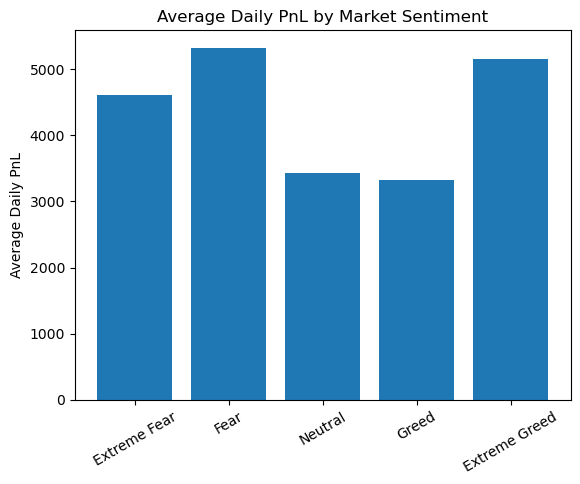

In [37]:
plt.figure()
plt.bar(
    sentiment_summary['classification'],
    sentiment_summary['avg_daily_pnl']
)
plt.title('Average Daily PnL by Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.xticks(rotation=30)
plt.show()


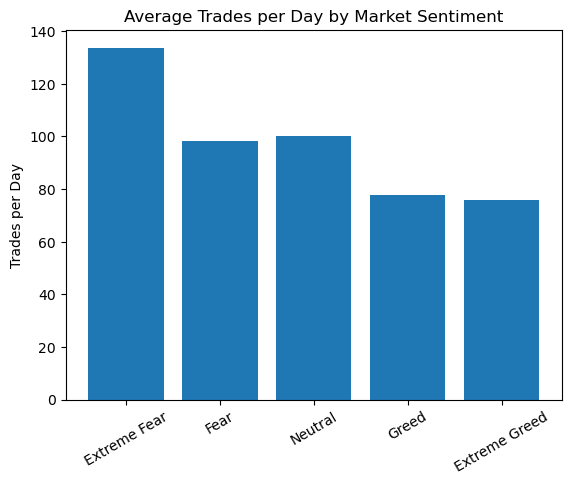

In [38]:
plt.figure()
plt.bar(
    sentiment_summary['classification'],
    sentiment_summary['avg_trades_per_day']
)
plt.title('Average Trades per Day by Market Sentiment')
plt.ylabel('Trades per Day')
plt.xticks(rotation=30)
plt.show()

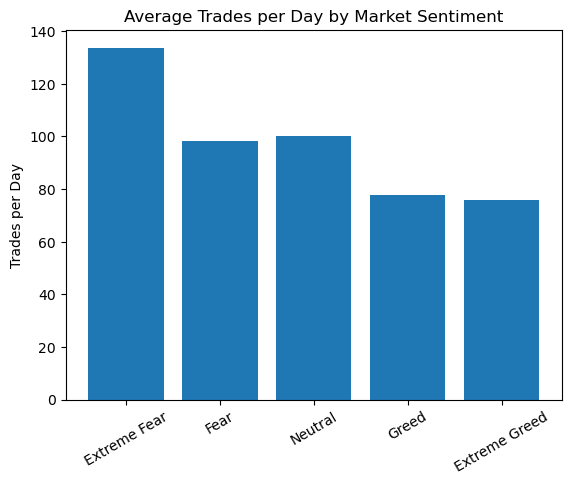

In [39]:
plt.figure()
plt.bar(
    sentiment_summary['classification'],
    sentiment_summary['avg_trades_per_day']
)
plt.title('Average Trades per Day by Market Sentiment')
plt.ylabel('Trades per Day')
plt.xticks(rotation=30)
plt.show()

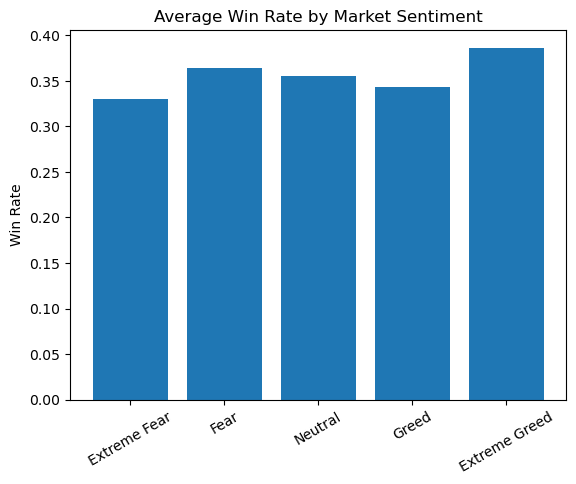

In [40]:
plt.figure()
plt.bar(
    sentiment_summary['classification'],
    sentiment_summary['avg_win_rate']
)
plt.title('Average Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xticks(rotation=30)
plt.show()